## Chapter 6 - Exercise 1: Trực quan hóa dữ liệu Chipotle

### Cho dữ liệu 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

Nhà hàng Chipotle cần phân tích dữ liệu bán được trong ngày diễn ra khuyến mãi để có thể điều chỉnh thực đơn và thực hiện các chương trình khuyến mãi phù hợp. 

Dữ liệu được cung cấp trong file chipotle.tsv, hãy thực hiện các yêu cầu sau và đối chiếu với kết quả.

Lưu ý:
1. Để tạo một dictionary với key là item_name và value là tần suất xuất hiện của item_name, sử dụng: <span style="color:blue">collections.Counter(biến_chứa_các_item_name)</span>
2. Chuyển dictionary thành dataframe: <span style="color:blue">pd.DataFrame.from_dict(dictionary, orient='index')</span>

In [289]:
import pandas as pd
import collections
import matplotlib.pyplot as plt 
import collections

%matplotlib inline
data = pd.read_csv('chipotle.tsv', sep='\t')
data.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [290]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
order_id              4622 non-null int64
quantity              4622 non-null int64
item_name             4622 non-null object
choice_description    3376 non-null object
item_price            4622 non-null object
dtypes: int64(2), object(3)
memory usage: 180.6+ KB


In [291]:
item_name = data.item_name
item_name.head()

0             Chips and Fresh Tomato Salsa
1                                     Izze
2                         Nantucket Nectar
3    Chips and Tomatillo-Green Chili Salsa
4                             Chicken Bowl
Name: item_name, dtype: object

In [292]:
item_ocurrences = collections.Counter(item_name)
item_ocurrences

Counter({'Chips and Fresh Tomato Salsa': 110,
         'Izze': 20,
         'Nantucket Nectar': 27,
         'Chips and Tomatillo-Green Chili Salsa': 31,
         'Chicken Bowl': 726,
         'Side of Chips': 101,
         'Steak Burrito': 368,
         'Steak Soft Tacos': 55,
         'Chips and Guacamole': 479,
         'Chicken Crispy Tacos': 47,
         'Chicken Soft Tacos': 115,
         'Chicken Burrito': 553,
         'Canned Soda': 104,
         'Barbacoa Burrito': 91,
         'Carnitas Burrito': 59,
         'Carnitas Bowl': 68,
         'Bottled Water': 162,
         'Chips and Tomatillo Green Chili Salsa': 43,
         'Barbacoa Bowl': 66,
         'Chips': 211,
         'Chicken Salad Bowl': 110,
         'Steak Bowl': 211,
         'Barbacoa Soft Tacos': 25,
         'Veggie Burrito': 95,
         'Veggie Bowl': 85,
         'Steak Crispy Tacos': 35,
         'Chips and Tomatillo Red Chili Salsa': 48,
         'Barbacoa Crispy Tacos': 11,
         'Veggie Salad Bowl': 1

In [293]:
df = pd.DataFrame.from_dict(item_ocurrences, orient='index')
df.head()

,0
Chips and Fresh Tomato Salsa,110
Izze,20
Nantucket Nectar,27
Chips and Tomatillo-Green Chili Salsa,31
Chicken Bowl,726


In [294]:
sorted_items = df.sort_values(by=0, ascending=False)
sorted_items.head()
most_ordered = sorted_items.head(5)

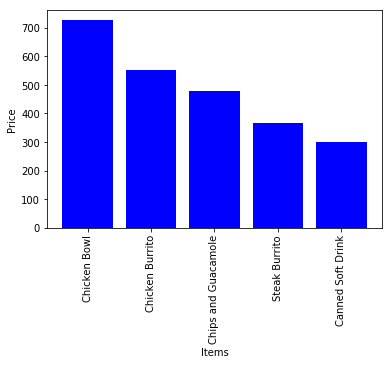

In [295]:
items = most_ordered.index
price = most_ordered[0].values
plt.bar(items, price, color='b')
plt.xticks(rotation=90)
plt.xlabel('Items')
plt.ylabel('Price')
plt.show()

In [296]:
data.dtypes
data['item_price_float'] = data['item_price'].map(lambda x: float(x.split('$')[1]))
data.head()

,order_id,quantity,item_name,choice_description,item_price,item_price_float
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39,2.39
1,1,1,Izze,[Clementine],$3.39,3.39
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98


In [297]:
print(data.dtypes)

order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price             object
item_price_float      float64
dtype: object


In [298]:
order_data = data[['order_id', 'quantity', 'item_name', 'item_price_float']]
order_data.head()

,order_id,quantity,item_name,item_price_float
0,1,1,Chips and Fresh Tomato Salsa,2.39
1,1,1,Izze,3.39
2,1,1,Nantucket Nectar,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,2.39
4,2,2,Chicken Bowl,16.98


In [300]:
gp_order_id = order_data.groupby('order_id')[['quantity', 'item_price_float']].sum()
gp_order_id.head()

,quantity,item_price_float
order_id,,
1,4,11.56
2,2,16.98
3,2,12.67
4,2,21.00
5,2,13.70


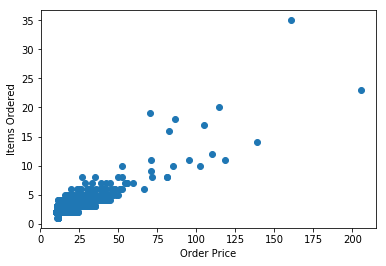

In [305]:
x = gp_order_id['item_price_float'].values
y = gp_order_id['quantity'].values
plt.scatter(x, y)
plt.xlabel('Order Price')
plt.ylabel('Items Ordered')
plt.show()

<details>
  <summary>Nhấn vào đây để xem kết quả !</summary>
  
<div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>order_id</th>
      <th>quantity</th>
      <th>item_name</th>
      <th>choice_description</th>
      <th>item_price</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>1</td>
      <td>1</td>
      <td>Chips and Fresh Tomato Salsa</td>
      <td>NaN</td>
      <td>&#36;2.39</td>
    </tr>
    <tr>
      <th>1</th>
      <td>1</td>
      <td>1</td>
      <td>Izze</td>
      <td>[Clementine]</td>
      <td>&#36;3.39</td>
    </tr>
    <tr>
      <th>2</th>
      <td>1</td>
      <td>1</td>
      <td>Nantucket Nectar</td>
      <td>[Apple]</td>
      <td>&#36;3.39</td>
    </tr>
    <tr>
      <th>3</th>
      <td>1</td>
      <td>1</td>
      <td>Chips and Tomatillo-Green Chili Salsa</td>
      <td>NaN</td>
      <td>&#36;2.39</td>
    </tr>
    <tr>
      <th>4</th>
      <td>2</td>
      <td>2</td>
      <td>Chicken Bowl</td>
      <td>[Tomatillo-Red Chili Salsa (Hot), [Black Beans...</td>
      <td>&#36;16.98</td>
    </tr>
    <tr>
      <th>5</th>
      <td>3</td>
      <td>1</td>
      <td>Chicken Bowl</td>
      <td>[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...</td>
      <td>&#36;10.98</td>
    </tr>
    <tr>
      <th>6</th>
      <td>3</td>
      <td>1</td>
      <td>Side of Chips</td>
      <td>NaN</td>
      <td>&#36;1.69</td>
    </tr>
    <tr>
      <th>7</th>
      <td>4</td>
      <td>1</td>
      <td>Steak Burrito</td>
      <td>[Tomatillo Red Chili Salsa, [Fajita Vegetables...</td>
      <td>&#36;11.75</td>
    </tr>
    <tr>
      <th>8</th>
      <td>4</td>
      <td>1</td>
      <td>Steak Soft Tacos</td>
      <td>[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...</td>
      <td>&#36;9.25</td>
    </tr>
    <tr>
      <th>9</th>
      <td>5</td>
      <td>1</td>
      <td>Steak Burrito</td>
      <td>[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...</td>
      <td>&#36;9.25</td>
    </tr>
  </tbody>
</table>
</div>

</details>

<details>
  <summary>Nhấn vào đây để xem kết quả !</summary>
  
<pre>0             Chips and Fresh Tomato Salsa
1                                     Izze
2                         Nantucket Nectar
3    Chips and Tomatillo-Green Chili Salsa
4                             Chicken Bowl
Name: item_name, dtype: object

Counter({'Chicken Bowl': 726, 'Chicken Burrito': 553, 'Chips and Guacamole': 479, 'Steak Burrito': 368, 'Canned Soft Drink': 301, 'Chips': 211, 'Steak Bowl': 211, 'Bottled Water': 162, 'Chicken Soft Tacos': 115, 'Chips and Fresh Tomato Salsa': 110, 'Chicken Salad Bowl': 110, 'Canned Soda': 104, 'Side of Chips': 101, 'Veggie Burrito': 95, 'Barbacoa Burrito': 91, 'Veggie Bowl': 85, 'Carnitas Bowl': 68, 'Barbacoa Bowl': 66, 'Carnitas Burrito': 59, 'Steak Soft Tacos': 55, '6 Pack Soft Drink': 54, 'Chips and Tomatillo Red Chili Salsa': 48, 'Chicken Crispy Tacos': 47, 'Chips and Tomatillo Green Chili Salsa': 43, 'Carnitas Soft Tacos': 40, 'Steak Crispy Tacos': 35, 'Chips and Tomatillo-Green Chili Salsa': 31, 'Steak Salad Bowl': 29, 'Nantucket Nectar': 27, 'Barbacoa Soft Tacos': 25, 'Chips and Roasted Chili Corn Salsa': 22, 'Izze': 20, 'Chips and Tomatillo-Red Chili Salsa': 20, 'Veggie Salad Bowl': 18, 'Chips and Roasted Chili-Corn Salsa': 18, 'Barbacoa Crispy Tacos': 11, 'Barbacoa Salad Bowl': 10, 'Chicken Salad': 9, 'Carnitas Crispy Tacos': 7, 'Veggie Soft Tacos': 7, 'Burrito': 6, 'Carnitas Salad Bowl': 6, 'Veggie Salad': 6, 'Steak Salad': 4, 'Bowl': 2, 'Crispy Tacos': 2, 'Salad': 2, 'Chips and Mild Fresh Tomato Salsa': 1, 'Veggie Crispy Tacos': 1, 'Carnitas Salad': 1})
</pre>

</details>

<details>
  <summary>Nhấn vào đây để xem kết quả !</summary>
  
<pre>                                         0
Chips and Fresh Tomato Salsa           110
Izze                                    20
Nantucket Nectar                        27
Chips and Tomatillo-Green Chili Salsa   31
Chicken Bowl                           726
</pre>

</details>

<details>
  <summary>Nhấn vào đây để xem kết quả !</summary>
  <div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>0</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Chicken Bowl</th>
      <td>726</td>
    </tr>
    <tr>
      <th>Chicken Burrito</th>
      <td>553</td>
    </tr>
    <tr>
      <th>Chips and Guacamole</th>
      <td>479</td>
    </tr>
    <tr>
      <th>Steak Burrito</th>
      <td>368</td>
    </tr>
    <tr>
      <th>Canned Soft Drink</th>
      <td>301</td>
    </tr>
  </tbody>
</table>
</div>

<div class="output_subarea output_png"><img src="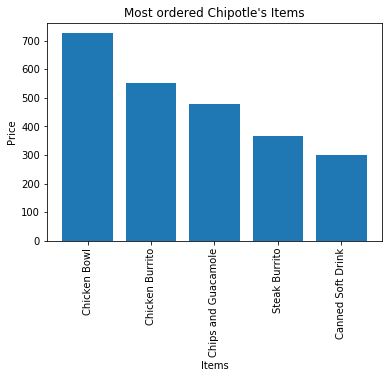
"></div>

</details>

<details>
  <summary>Nhấn vào đây để xem kết quả !</summary>
  
<div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>order_id</th>
      <th>quantity</th>
      <th>item_name</th>
      <th>choice_description</th>
      <th>item_price</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>1</td>
      <td>1</td>
      <td>Chips and Fresh Tomato Salsa</td>
      <td>NaN</td>
      <td>2.39</td>
    </tr>
    <tr>
      <th>1</th>
      <td>1</td>
      <td>1</td>
      <td>Izze</td>
      <td>[Clementine]</td>
      <td>3.39</td>
    </tr>
    <tr>
      <th>2</th>
      <td>1</td>
      <td>1</td>
      <td>Nantucket Nectar</td>
      <td>[Apple]</td>
      <td>3.39</td>
    </tr>
    <tr>
      <th>3</th>
      <td>1</td>
      <td>1</td>
      <td>Chips and Tomatillo-Green Chili Salsa</td>
      <td>NaN</td>
      <td>2.39</td>
    </tr>
    <tr>
      <th>4</th>
      <td>2</td>
      <td>2</td>
      <td>Chicken Bowl</td>
      <td>[Tomatillo-Red Chili Salsa (Hot), [Black Beans...</td>
      <td>16.98</td>
    </tr>
  </tbody>
</table>
</div>

</details>

<details>
  <summary>Nhấn vào đây để xem kết quả !</summary>
  
<div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantity</th>
      <th>item_price</th>
    </tr>
    <tr>
      <th>order_id</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>4</td>
      <td>11.56</td>
    </tr>
    <tr>
      <th>2</th>
      <td>2</td>
      <td>16.98</td>
    </tr>
    <tr>
      <th>3</th>
      <td>2</td>
      <td>12.67</td>
    </tr>
    <tr>
      <th>4</th>
      <td>2</td>
      <td>21.00</td>
    </tr>
    <tr>
      <th>5</th>
      <td>2</td>
      <td>13.70</td>
    </tr>
  </tbody>
</table>
</div>

</details>

<details>
  <summary>Nhấn vào đây để xem kết quả !</summary>
<pre>(0, 36.7178857951459)</pre>
    
<div class="output_subarea output_png"><img src="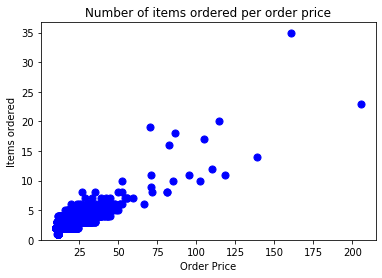
"></div>

</details>